In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
train_df = pd.read_csv("C:\\Users\\seung\\OneDrive\\Desktop\\house_data\\data\\train.csv")
test_df = pd.read_csv("C:\\Users\\seung\\OneDrive\\Desktop\\house_data\\data\\test.csv")
combine = [train_df, test_df]

In [4]:
train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
test_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [6]:
train_y = train_df["SalePrice"]

In [7]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [9]:
#범주형 데이터 표시해보기.
obj_df=train_df.select_dtypes(include=['object']).copy()
obj_df.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [10]:
#null데이터 모두 표시
null_df = train_df[train_df.isnull().any(axis=1)]
null_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [11]:
#카테고리 데이터로 적합한지 데이터 합계 출력
obj_df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [12]:
(train_df.isnull().sum()/len(train_df)*100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
LotConfig         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
BsmtFinSF1        0.000000
M

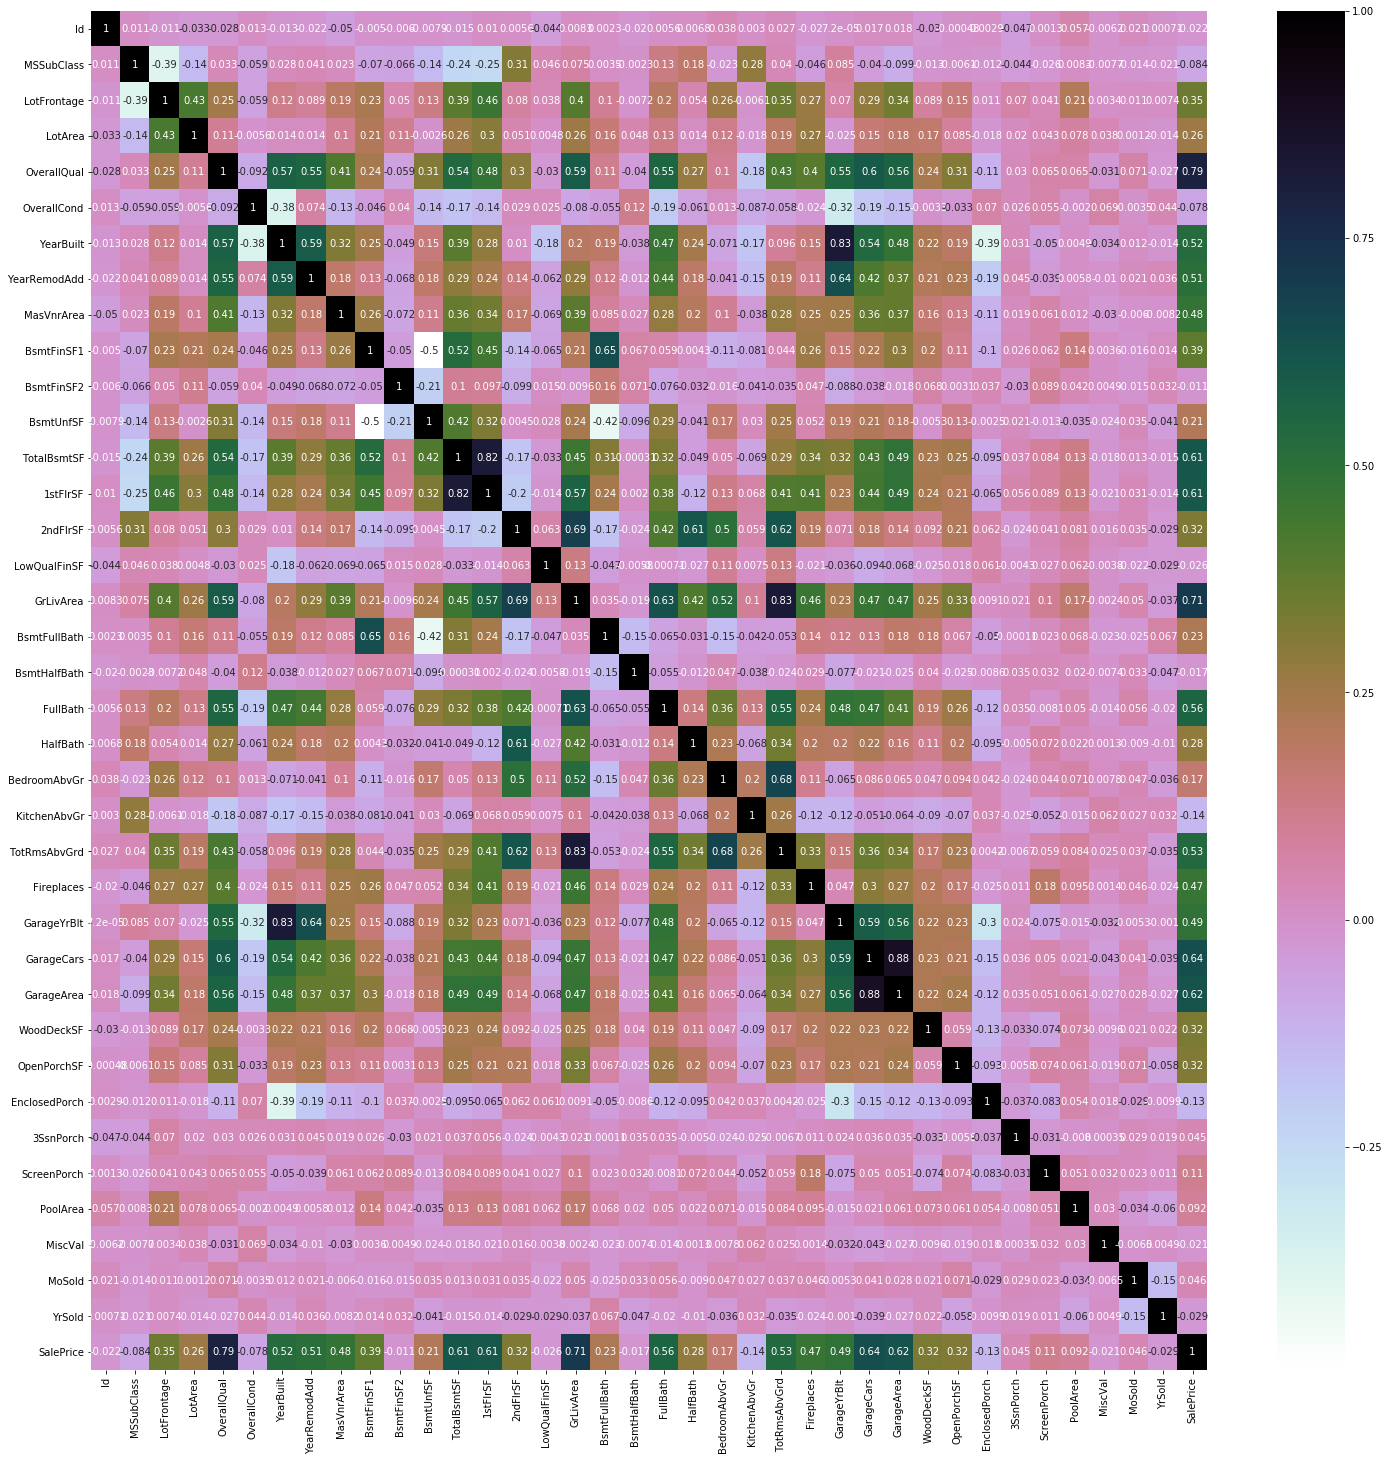

In [13]:
plt.figure(figsize=(25,25)) 
sns.heatmap(train_df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [14]:
obj_df["SalePrice"]=train_df["SalePrice"]

In [15]:
obj_df.isnull().sum()/len(obj_df)*100

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [16]:
len(obj_df["MSZoning"].unique())

5

In [17]:
len(obj_df.columns)

44

In [18]:
(obj_df.isnull().sum()/len(obj_df)*100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
GarageCond        5.547945
GarageQual        5.547945
GarageFinish      5.547945
GarageType        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrType        0.547945
Electrical        0.068493
LotConfig         0.000000
LandSlope         0.000000
Utilities         0.000000
RoofMatl          0.000000
LandContour       0.000000
LotShape          0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
Street            0.000000
HouseStyle        0.000000
RoofStyle         0.000000
SalePrice         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
SaleCondition     0.000000
Heating           0.000000
H

In [19]:
drop_obj_columns = []
for column in obj_df.columns:
    if obj_df[column].isnull().sum()/len(train_df) >= 0.5:
        drop_obj_columns.append(column)
drop_obj_columns

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [20]:
obj_df.drop(drop_obj_columns, axis=1, inplace=True)
for df in combine:
    df.drop(drop_obj_columns, axis=1, inplace=True)
combine=[train_df, test_df]

In [21]:
obj_df_use=[]
for columns in obj_df.columns:
    if len(obj_df[columns].unique()) >=10:
        obj_df_use.append(columns)
obj_df_use

['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

In [22]:
obj_df_use2=[]
for columns in obj_df.columns:
    if len(obj_df[columns].unique()) == 3:
        obj_df_use2.append(columns)
obj_df_use2

['LandSlope', 'PavedDrive']

In [23]:
obj_df["LandSlope"].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [24]:
train_df["LandSlope"].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [25]:
obj_df["PavedDrive"].unique()

array(['Y', 'N', 'P'], dtype=object)

In [26]:
combine=[train_df, test_df]
landslope_mapping={"Gtl":1, "Mod":2, "Sev":3}
for df in combine:
    df["LandSlope"]=df["LandSlope"].map(landslope_mapping)
train_df.head()
    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,1,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,1,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,1,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [27]:
combine=[train_df, test_df]
paveddrive_mapping={"Y":0, "N":1, "P":2}
for df in combine:
    df["PavedDrive"]=df["PavedDrive"].map(paveddrive_mapping)
train_df.head()
    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,0,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,1,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,0,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,0,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,1,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,0,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,1,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,0,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

In [28]:
obj_df["LandSlope"].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

종류가 10개 이상의 범주형 데이터 'Neighborhood', 'Exterior1st', 'Exterior2nd
종류가 3개 인 범주형 데이터 PavedDrive, LandSlope 

In [29]:
obj_df["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [30]:
N_list = obj_df["Neighborhood"].unique().tolist()
N_list

['CollgCr',
 'Veenker',
 'Crawfor',
 'NoRidge',
 'Mitchel',
 'Somerst',
 'NWAmes',
 'OldTown',
 'BrkSide',
 'Sawyer',
 'NridgHt',
 'NAmes',
 'SawyerW',
 'IDOTRR',
 'MeadowV',
 'Edwards',
 'Timber',
 'Gilbert',
 'StoneBr',
 'ClearCr',
 'NPkVill',
 'Blmngtn',
 'BrDale',
 'SWISU',
 'Blueste']

In [31]:
train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,0,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,1,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,0,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [32]:
combine=[train_df, test_df]
i=0
for obj in N_list:
    for dataset in combine:
        dataset["Neighborhood"] = dataset["Neighborhood"].replace({obj:i})
    i += 1

In [33]:
obj_df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [34]:
N_list = obj_df['Exterior1st'].unique().tolist()
N_list

['VinylSd',
 'MetalSd',
 'Wd Sdng',
 'HdBoard',
 'BrkFace',
 'WdShing',
 'CemntBd',
 'Plywood',
 'AsbShng',
 'Stucco',
 'BrkComm',
 'AsphShn',
 'Stone',
 'ImStucc',
 'CBlock']

In [35]:
combine=[train_df, test_df]
i=0
for obj in N_list:
    for dataset in combine:
        dataset['Exterior1st'] = dataset['Exterior1st'].replace({obj:i})
    i += 1

In [36]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,1,0,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,0,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,0,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,1,1,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,1,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,0,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,1,0,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,0,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,0,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,1,2,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,2,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,0,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,1,3,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,0,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,0,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [37]:
obj_df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [38]:
N_list = obj_df['Exterior2nd'].unique().tolist()
N_list

['VinylSd',
 'MetalSd',
 'Wd Shng',
 'HdBoard',
 'Plywood',
 'Wd Sdng',
 'CmentBd',
 'BrkFace',
 'Stucco',
 'AsbShng',
 'Brk Cmn',
 'ImStucc',
 'AsphShn',
 'Stone',
 'Other',
 'CBlock']

In [39]:
combine=[train_df, test_df]
i=0
for obj in N_list:
    for dataset in combine:
        dataset['Exterior2nd'] = dataset['Exterior2nd'].replace({obj:i})
    i += 1

In [40]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,1,0,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,0,0,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,0,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,1,1,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,1,1,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,0,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,1,0,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,0,0,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,0,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,1,2,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,2,2,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,0,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,1,3,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,0,0,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,0,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,1,4,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,0,0,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,0,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,1,5,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,0,0,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,0,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,1,6,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,3,3,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,0,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,1,7,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,4,2,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,0,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,1,8,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,1,1,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,0,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [41]:
obj_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [42]:
obj_df=train_df[['Neighborhood', 'Exterior1st', 'Exterior2nd', 'LandSlope', 'PavedDrive','SalePrice']]

In [43]:
obj_df.dtypes

Neighborhood    int64
Exterior1st     int64
Exterior2nd     int64
LandSlope       int64
PavedDrive      int64
SalePrice       int64
dtype: object

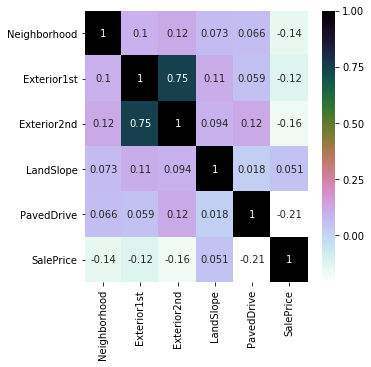

In [44]:
plt.figure(figsize=(5,5)) 
sns.heatmap(obj_df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [45]:
obj_df_t=obj_df

In [46]:
obj_feature_names = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'LandSlope', 'PavedDrive']

for var in obj_feature_names:
    train_df[var] = train_df[var].astype("category")
    test_df[var] = test_df[var].astype("category")
    

C:\Users\seung\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


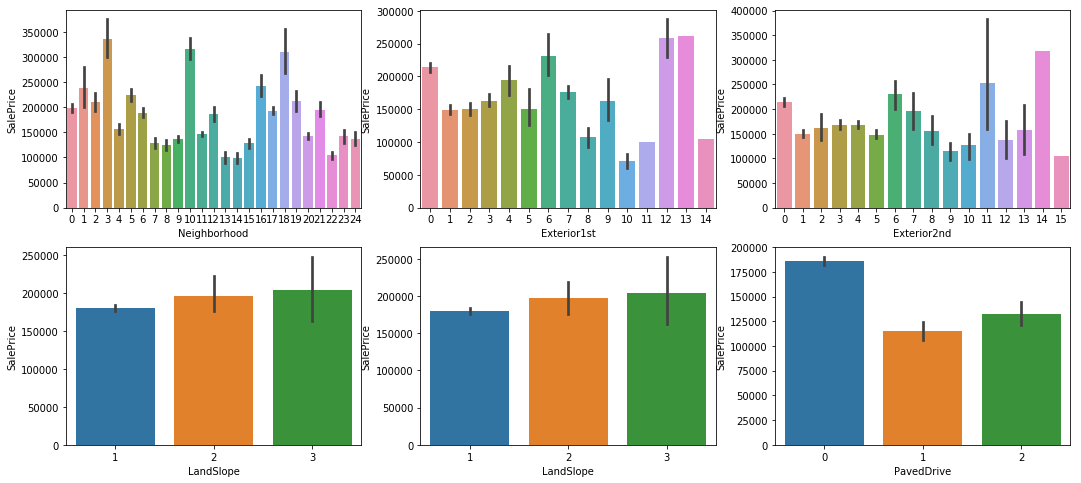

In [47]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train_df, x="Neighborhood", y="SalePrice", ax=ax1)
sns.barplot(data=train_df, x="Exterior1st", y="SalePrice", ax=ax2)
sns.barplot(data=train_df, x="Exterior2nd", y="SalePrice", ax=ax3)
sns.barplot(data=train_df, x="LandSlope", y="SalePrice", ax=ax4)
sns.barplot(data=train_df, x="LandSlope", y="SalePrice", ax=ax5)
sns.barplot(data=train_df, x="PavedDrive", y="SalePrice", ax=ax6)


In [48]:
(train_df.corr()["SalePrice"][(train_df.corr()["SalePrice"])>0.5]).sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [49]:
train_df= train_df[["YearRemodAdd", "YearBuilt","TotRmsAbvGrd","FullBath","1stFlrSF","TotalBsmtSF","GarageArea","GarageCars","GrLivArea","OverallQual",'Neighborhood', 'Exterior1st', 'Exterior2nd', 'LandSlope', 'PavedDrive',"SalePrice"]]
test_df= test_df[["YearRemodAdd", "YearBuilt","TotRmsAbvGrd","FullBath","1stFlrSF","TotalBsmtSF","GarageArea","GarageCars","GrLivArea","OverallQual",'Neighborhood', 'Exterior1st', 'Exterior2nd', 'LandSlope', 'PavedDrive']]

In [50]:
train_df

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Neighborhood,Exterior1st,Exterior2nd,LandSlope,PavedDrive,SalePrice
0,2003,2003,8,2,856,856,548,2,1710,7,0,0,0,1,0,208500
1,1976,1976,6,2,1262,1262,460,2,1262,6,1,1,1,1,0,181500
2,2002,2001,6,2,920,920,608,2,1786,7,0,0,0,1,0,223500
3,1970,1915,7,1,961,756,642,3,1717,7,2,2,2,1,0,140000
4,2000,2000,9,2,1145,1145,836,3,2198,8,3,0,0,1,0,250000
5,1995,1993,5,1,796,796,480,2,1362,5,4,0,0,1,0,143000
6,2005,2004,7,2,1694,1686,636,2,1694,8,5,0,0,1,0,307000
7,1973,1973,7,2,1107,1107,484,2,2090,7,6,3,3,1,0,200000
8,1950,1931,8,2,1022,952,468,2,1774,7,7,4,2,1,0,129900
9,1950,1939,5,1,1077,991,205,1,1077,5,8,1,1,1,0,118000


In [51]:
yearsale = train_df[['YearRemodAdd', 'SalePrice']].groupby(['YearRemodAdd'], as_index=False).mean()
yearsale.index = yearsale["YearRemodAdd"]
yearsale

,YearRemodAdd,SalePrice
YearRemodAdd,,
1950,1950,117463.056180
1951,1951,129975.000000
1952,1952,110398.600000
1953,1953,147640.000000
1954,1954,121142.857143
1955,1955,124511.111111
1956,1956,124235.000000
1957,1957,132656.444444
1958,1958,128386.666667


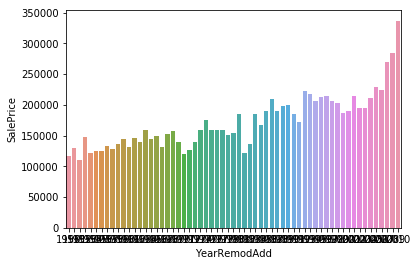

In [52]:
data = yearsale['SalePrice']
sns.barplot(y=data, x=data.index)

In [53]:
train_df['YearRemodAddcut'] = pd.qcut(train_df['YearRemodAdd'], 4)

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
yearsaler=train_df[['YearRemodAddcut', 'SalePrice']].groupby(['YearRemodAddcut'], as_index=False).mean().sort_values(by='YearRemodAddcut', ascending=True)
yearsaler

,YearRemodAddcut,SalePrice
0,"(1949.999, 1967.0]",127787.792553
1,"(1967.0, 1994.0]",166961.695187
2,"(1994.0, 2004.0]",201507.007595
3,"(2004.0, 2010.0]",235104.107937


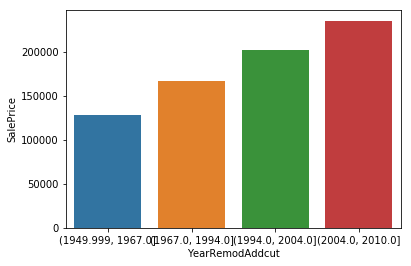

In [55]:
data = yearsaler
sns.barplot(y=data['SalePrice'], x=data['YearRemodAddcut'])

In [56]:
combine = [train_df, test_df]
train_df.head(2)

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Neighborhood,Exterior1st,Exterior2nd,LandSlope,PavedDrive,SalePrice,YearRemodAddcut
0,2003,2003,8,2,856,856,548,2,1710,7,0,0,0,1,0,208500,"(1994.0, 2004.0]"
1,1976,1976,6,2,1262,1262,460,2,1262,6,1,1,1,1,0,181500,"(1967.0, 1994.0]"


In [57]:
for dataset in combine:
    dataset.loc[ dataset['YearRemodAdd'] <= 1967, 'YearRemodAdd'] = 0
    dataset.loc[(dataset['YearRemodAdd'] > 1967) & (dataset['YearRemodAdd'] <= 1994), 'YearRemodAdd'] = 1
    dataset.loc[(dataset['YearRemodAdd'] > 1994) & (dataset['YearRemodAdd'] <= 2004), 'YearRemodAdd'] = 2
    dataset.loc[ dataset['YearRemodAdd'] > 2004, 'YearRemodAdd'] = 3

train_df = train_df.drop(['YearRemodAddcut'], axis=1)

    
train_df.head(10)

C:\Users\seung\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Neighborhood,Exterior1st,Exterior2nd,LandSlope,PavedDrive,SalePrice
0,2,2003,8,2,856,856,548,2,1710,7,0,0,0,1,0,208500
1,1,1976,6,2,1262,1262,460,2,1262,6,1,1,1,1,0,181500
2,2,2001,6,2,920,920,608,2,1786,7,0,0,0,1,0,223500
3,1,1915,7,1,961,756,642,3,1717,7,2,2,2,1,0,140000
4,2,2000,9,2,1145,1145,836,3,2198,8,3,0,0,1,0,250000
5,2,1993,5,1,796,796,480,2,1362,5,4,0,0,1,0,143000
6,3,2004,7,2,1694,1686,636,2,1694,8,5,0,0,1,0,307000
7,1,1973,7,2,1107,1107,484,2,2090,7,6,3,3,1,0,200000
8,0,1931,8,2,1022,952,468,2,1774,7,7,4,2,1,0,129900
9,0,1939,5,1,1077,991,205,1,1077,5,8,1,1,1,0,118000


In [58]:
train_df

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Neighborhood,Exterior1st,Exterior2nd,LandSlope,PavedDrive,SalePrice
0,2,2003,8,2,856,856,548,2,1710,7,0,0,0,1,0,208500
1,1,1976,6,2,1262,1262,460,2,1262,6,1,1,1,1,0,181500
2,2,2001,6,2,920,920,608,2,1786,7,0,0,0,1,0,223500
3,1,1915,7,1,961,756,642,3,1717,7,2,2,2,1,0,140000
4,2,2000,9,2,1145,1145,836,3,2198,8,3,0,0,1,0,250000
5,2,1993,5,1,796,796,480,2,1362,5,4,0,0,1,0,143000
6,3,2004,7,2,1694,1686,636,2,1694,8,5,0,0,1,0,307000
7,1,1973,7,2,1107,1107,484,2,2090,7,6,3,3,1,0,200000
8,0,1931,8,2,1022,952,468,2,1774,7,7,4,2,1,0,129900
9,0,1939,5,1,1077,991,205,1,1077,5,8,1,1,1,0,118000


In [59]:
yearbuilt = train_df[['YearBuilt', 'SalePrice']].groupby(['YearBuilt'], as_index=False).mean()
yearbuilt.index = yearbuilt["YearBuilt"]
yearbuilt

,YearBuilt,SalePrice
YearBuilt,,
1872,1872,122000.000000
1875,1875,94000.000000
1880,1880,200619.750000
1882,1882,168000.000000
1885,1885,111250.000000
1890,1890,142200.000000
1892,1892,291250.000000
1893,1893,325000.000000
1898,1898,106000.000000


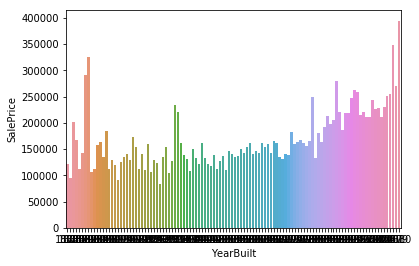

In [60]:
data = yearbuilt
sns.barplot(y=data['SalePrice'], x=data.index)

In [61]:
train_df['YearBuiltcut'] = pd.qcut(train_df['YearBuilt'], 4)

In [62]:
yearbuiltr=train_df[['YearBuiltcut', 'SalePrice']].groupby(['YearBuiltcut'], as_index=False).mean().sort_values(by='YearBuiltcut', ascending=True)
yearbuiltr

,YearBuiltcut,SalePrice
0,"(1871.999, 1954.0]",132731.129870
1,"(1954.0, 1973.0]",147376.481690
2,"(1973.0, 2000.0]",201451.727528
3,"(2000.0, 2010.0]",244527.458791


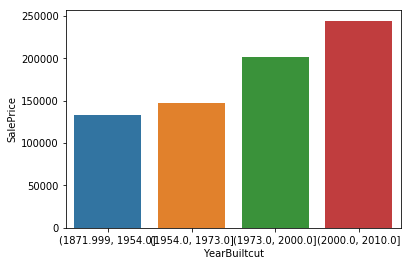

In [63]:
data = yearbuiltr
sns.barplot(y=data['SalePrice'], x=data['YearBuiltcut'])

In [64]:
combine=[train_df, test_df]
for dataset in combine:
    dataset.loc[ dataset['YearBuilt'] <= 1954, 'YearBuilt'] = 0
    dataset.loc[(dataset['YearBuilt'] > 1954) & (dataset['YearBuilt'] <= 1973), 'YearBuilt'] = 1
    dataset.loc[(dataset['YearBuilt'] > 1973) & (dataset['YearBuilt'] <= 2000), 'YearBuilt'] = 2
    dataset.loc[ dataset['YearBuilt'] > 2000, 'YearBuilt'] = 3

train_df = train_df.drop(['YearBuiltcut'], axis=1)

    
train_df.head(10)

C:\Users\seung\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Neighborhood,Exterior1st,Exterior2nd,LandSlope,PavedDrive,SalePrice
0,2,3,8,2,856,856,548,2,1710,7,0,0,0,1,0,208500
1,1,2,6,2,1262,1262,460,2,1262,6,1,1,1,1,0,181500
2,2,3,6,2,920,920,608,2,1786,7,0,0,0,1,0,223500
3,1,0,7,1,961,756,642,3,1717,7,2,2,2,1,0,140000
4,2,2,9,2,1145,1145,836,3,2198,8,3,0,0,1,0,250000
5,2,2,5,1,796,796,480,2,1362,5,4,0,0,1,0,143000
6,3,3,7,2,1694,1686,636,2,1694,8,5,0,0,1,0,307000
7,1,1,7,2,1107,1107,484,2,2090,7,6,3,3,1,0,200000
8,0,0,8,2,1022,952,468,2,1774,7,7,4,2,1,0,129900
9,0,0,5,1,1077,991,205,1,1077,5,8,1,1,1,0,118000


In [65]:
train_df["TotRmsAbvGrd"].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

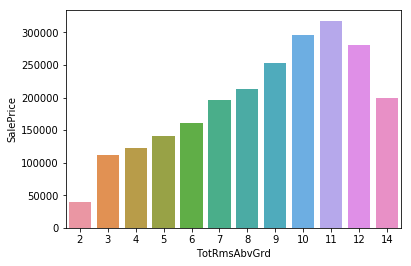

In [66]:
Tot = train_df[["TotRmsAbvGrd", 'SalePrice']].groupby(["TotRmsAbvGrd"], as_index=False).mean()
data = Tot
sns.barplot(y=data['SalePrice'], x=data["TotRmsAbvGrd"])

In [67]:
train_df["TotRmsAbvGrd"].dtype

dtype('int64')

In [68]:
train_df['1stFlrSFcut'] = pd.qcut(train_df['1stFlrSF'], 4)
floor_df=train_df[['1stFlrSFcut', 'SalePrice']].groupby(['1stFlrSFcut'], as_index=False).mean().sort_values(by='1stFlrSFcut', ascending=True)
floor_df

,1stFlrSFcut,SalePrice
0,"(333.999, 882.0]",136129.551630
1,"(882.0, 1087.0]",152143.331492
2,"(1087.0, 1391.25]",182607.134247
3,"(1391.25, 4692.0]",252936.386301


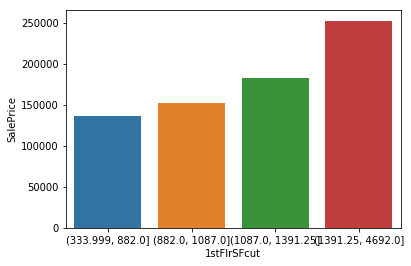

In [69]:
data= floor_df
sns.barplot(y=data['SalePrice'], x=data['1stFlrSFcut'])

In [70]:
combine=[train_df, test_df]
for dataset in combine:
    dataset.loc[ dataset['1stFlrSF'] <= 882, '1stFlrSF'] = 0
    dataset.loc[(dataset['1stFlrSF'] > 882) & (dataset['1stFlrSF'] <= 1087), '1stFlrSF'] = 1
    dataset.loc[(dataset['1stFlrSF'] > 1087) & (dataset['1stFlrSF'] <= 1391.25), '1stFlrSF'] = 2
    dataset.loc[ dataset['1stFlrSF'] > 1391.25, '1stFlrSF'] = 3

train_df = train_df.drop(['1stFlrSFcut'], axis=1)

    
train_df.head(10)

C:\Users\seung\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Neighborhood,Exterior1st,Exterior2nd,LandSlope,PavedDrive,SalePrice
0,2,3,8,2,0,856,548,2,1710,7,0,0,0,1,0,208500
1,1,2,6,2,2,1262,460,2,1262,6,1,1,1,1,0,181500
2,2,3,6,2,1,920,608,2,1786,7,0,0,0,1,0,223500
3,1,0,7,1,1,756,642,3,1717,7,2,2,2,1,0,140000
4,2,2,9,2,2,1145,836,3,2198,8,3,0,0,1,0,250000
5,2,2,5,1,0,796,480,2,1362,5,4,0,0,1,0,143000
6,3,3,7,2,3,1686,636,2,1694,8,5,0,0,1,0,307000
7,1,1,7,2,2,1107,484,2,2090,7,6,3,3,1,0,200000
8,0,0,8,2,1,952,468,2,1774,7,7,4,2,1,0,129900
9,0,0,5,1,1,991,205,1,1077,5,8,1,1,1,0,118000


In [71]:
train_df["TotalBsmtSFcut"] = pd.qcut(train_df["TotalBsmtSF"], 4)
floor_df2=train_df[["TotalBsmtSFcut", 'SalePrice']].groupby(["TotalBsmtSFcut"], as_index=False).mean().sort_values(by="TotalBsmtSFcut", ascending=True)
floor_df2

,TotalBsmtSFcut,SalePrice
0,"(-0.001, 795.75]",134233.021918
1,"(795.75, 991.5]",154218.002740
2,"(991.5, 1298.25]",179998.663014
3,"(1298.25, 6110.0]",255235.095890


In [72]:
combine=[train_df, test_df]
for dataset in combine:
    dataset.loc[ dataset["TotalBsmtSF"] <= 795.75, "TotalBsmtSF"] = 0
    dataset.loc[(dataset["TotalBsmtSF"] > 795.75) & (dataset["TotalBsmtSF"] <= 991.5), "TotalBsmtSF"] = 1
    dataset.loc[(dataset["TotalBsmtSF"] > 991.5) & (dataset["TotalBsmtSF"] <= 1298.25), "TotalBsmtSF"] = 2
    dataset.loc[ dataset["TotalBsmtSF"] > 1298.25, "TotalBsmtSF"] = 3

train_df = train_df.drop(["TotalBsmtSFcut"], axis=1)

    
train_df.head(10)

C:\Users\seung\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Neighborhood,Exterior1st,Exterior2nd,LandSlope,PavedDrive,SalePrice
0,2,3,8,2,0,1,548,2,1710,7,0,0,0,1,0,208500
1,1,2,6,2,2,2,460,2,1262,6,1,1,1,1,0,181500
2,2,3,6,2,1,1,608,2,1786,7,0,0,0,1,0,223500
3,1,0,7,1,1,0,642,3,1717,7,2,2,2,1,0,140000
4,2,2,9,2,2,2,836,3,2198,8,3,0,0,1,0,250000
5,2,2,5,1,0,1,480,2,1362,5,4,0,0,1,0,143000
6,3,3,7,2,3,3,636,2,1694,8,5,0,0,1,0,307000
7,1,1,7,2,2,2,484,2,2090,7,6,3,3,1,0,200000
8,0,0,8,2,1,1,468,2,1774,7,7,4,2,1,0,129900
9,0,0,5,1,1,1,205,1,1077,5,8,1,1,1,0,118000


In [73]:
train_df["TotalBsmtSF"].value_counts()

3    365
2    365
1    365
0    365
Name: TotalBsmtSF, dtype: int64

In [74]:
train_df["GarageAreacut"] = pd.qcut(train_df["GarageArea"], 4)
floor_df2=train_df[["GarageAreacut", 'SalePrice']].groupby(["GarageAreacut"], as_index=False).mean().sort_values(by="GarageAreacut", ascending=True)
floor_df2

,GarageAreacut,SalePrice
0,"(-0.001, 334.5]",122613.331507
1,"(334.5, 480.0]",163041.693299
2,"(480.0, 576.0]",184149.549296
3,"(576.0, 1418.0]",257834.696023


In [75]:
combine=[train_df, test_df]
for dataset in combine:
    dataset.loc[ dataset["GarageArea"] <= 334.5, "GarageArea"] = 0
    dataset.loc[(dataset["GarageArea"] > 334.5) & (dataset["GarageArea"] <= 480), "GarageArea"] = 1
    dataset.loc[(dataset["GarageArea"] > 480) & (dataset["GarageArea"] <= 576), "GarageArea"] = 2
    dataset.loc[ dataset["GarageArea"] > 576, "GarageArea"] = 3

train_df = train_df.drop(["GarageAreacut"], axis=1)

    
train_df.head(10)

C:\Users\seung\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Neighborhood,Exterior1st,Exterior2nd,LandSlope,PavedDrive,SalePrice
0,2,3,8,2,0,1,2,2,1710,7,0,0,0,1,0,208500
1,1,2,6,2,2,2,1,2,1262,6,1,1,1,1,0,181500
2,2,3,6,2,1,1,3,2,1786,7,0,0,0,1,0,223500
3,1,0,7,1,1,0,3,3,1717,7,2,2,2,1,0,140000
4,2,2,9,2,2,2,3,3,2198,8,3,0,0,1,0,250000
5,2,2,5,1,0,1,1,2,1362,5,4,0,0,1,0,143000
6,3,3,7,2,3,3,3,2,1694,8,5,0,0,1,0,307000
7,1,1,7,2,2,2,2,2,2090,7,6,3,3,1,0,200000
8,0,0,8,2,1,1,1,2,1774,7,7,4,2,1,0,129900
9,0,0,5,1,1,1,0,1,1077,5,8,1,1,1,0,118000


In [76]:
train_df["GrLivAreacut"] = pd.qcut(train_df["GrLivArea"], 4)
floor_df2=train_df[["GrLivAreacut", 'SalePrice']].groupby(["GrLivAreacut"], as_index=False).mean().sort_values(by="GrLivAreacut", ascending=True)
floor_df2

,GrLivAreacut,SalePrice
0,"(333.999, 1129.5]",118678.383562
1,"(1129.5, 1464.0]",153513.098361
2,"(1464.0, 1776.75]",194250.107143
3,"(1776.75, 5642.0]",257354.802740


In [77]:
combine=[train_df, test_df]
for dataset in combine:
    dataset.loc[ dataset["GrLivArea"] <= 1129.5, "GrLivArea"] = 0
    dataset.loc[(dataset["GrLivArea"] > 1129.5) & (dataset["GrLivArea"] <= 1464), "GrLivArea"] = 1
    dataset.loc[(dataset["GrLivArea"] > 1464) & (dataset["GrLivArea"] <= 1776.75), "GrLivArea"] = 2
    dataset.loc[ dataset["GrLivArea"] > 1776.75, "GrLivArea"] = 3

train_df = train_df.drop(["GrLivAreacut"], axis=1)

    
train_df.head(10)

C:\Users\seung\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Neighborhood,Exterior1st,Exterior2nd,LandSlope,PavedDrive,SalePrice
0,2,3,8,2,0,1,2,2,2,7,0,0,0,1,0,208500
1,1,2,6,2,2,2,1,2,1,6,1,1,1,1,0,181500
2,2,3,6,2,1,1,3,2,3,7,0,0,0,1,0,223500
3,1,0,7,1,1,0,3,3,2,7,2,2,2,1,0,140000
4,2,2,9,2,2,2,3,3,3,8,3,0,0,1,0,250000
5,2,2,5,1,0,1,1,2,1,5,4,0,0,1,0,143000
6,3,3,7,2,3,3,3,2,2,8,5,0,0,1,0,307000
7,1,1,7,2,2,2,2,2,3,7,6,3,3,1,0,200000
8,0,0,8,2,1,1,1,2,2,7,7,4,2,1,0,129900
9,0,0,5,1,1,1,0,1,0,5,8,1,1,1,0,118000


In [78]:
train_df["GarageCars"].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

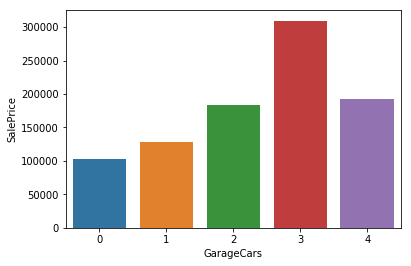

In [79]:
cars = train_df[["GarageCars", 'SalePrice']].groupby(["GarageCars"], as_index=False).mean()
data = cars
sns.barplot(y=data['SalePrice'], x=data["GarageCars"])

#train 데이터에는 없지만 test데이터에는 결측값이 있었다. 둘다 꼭 확인하기.
test데이타 결측치 처리하기.

In [80]:
test_df.isnull().sum()

YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     1
GarageArea      1
GarageCars      1
GrLivArea       0
OverallQual     0
Neighborhood    0
Exterior1st     1
Exterior2nd     1
LandSlope       0
PavedDrive      0
dtype: int64

In [81]:
test_df['TotalBsmtSF'].fillna((2), inplace=True)
test_df['GarageArea'].fillna((1), inplace=True)
test_df['GarageCars'].fillna((2), inplace=True)
test_df['Exterior1st'].fillna((0), inplace=True)
test_df['Exterior2nd'].fillna((0), inplace=True)

C:\Users\seung\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [82]:
test_df.isnull().sum()

YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
GrLivArea       0
OverallQual     0
Neighborhood    0
Exterior1st     0
Exterior2nd     0
LandSlope       0
PavedDrive      0
dtype: int64

In [83]:
test_df_id = pd.read_csv("C:\\Users\\seung\\OneDrive\\Desktop\\house_data\\data\\test.csv")

In [84]:
test_df.shape, train_df.shape

((1459, 15), (1460, 16))

In [85]:
train_y = train_df["SalePrice"]

In [86]:
train_df = train_df.drop(['SalePrice'], axis=1)

In [87]:
test_df.shape, train_df.shape

((1459, 15), (1460, 15))

In [88]:
train_df

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Neighborhood,Exterior1st,Exterior2nd,LandSlope,PavedDrive
0,2,3,8,2,0,1,2,2,2,7,0,0,0,1,0
1,1,2,6,2,2,2,1,2,1,6,1,1,1,1,0
2,2,3,6,2,1,1,3,2,3,7,0,0,0,1,0
3,1,0,7,1,1,0,3,3,2,7,2,2,2,1,0
4,2,2,9,2,2,2,3,3,3,8,3,0,0,1,0
5,2,2,5,1,0,1,1,2,1,5,4,0,0,1,0
6,3,3,7,2,3,3,3,2,2,8,5,0,0,1,0
7,1,1,7,2,2,2,2,2,3,7,6,3,3,1,0
8,0,0,8,2,1,1,1,2,2,7,7,4,2,1,0
9,0,0,5,1,1,1,0,1,0,5,8,1,1,1,0


In [89]:
train_df_r = pd.read_csv("C:\\Users\\seung\\OneDrive\\Desktop\\house_data\\data\\train.csv")
test_df_r = pd.read_csv("C:\\Users\\seung\\OneDrive\\Desktop\\house_data\\data\\test.csv")


In [90]:
train_df["YearRemodAdd"]=train_df_r["YearRemodAdd"]
test_df["YearRemodAdd"]=test_df_r["YearRemodAdd"]

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
train_df['YearBuilt']=train_df_r['YearBuilt']
test_df['YearBuilt']=test_df_r['YearBuilt']

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
train_df

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Neighborhood,Exterior1st,Exterior2nd,LandSlope,PavedDrive
0,2003,2003,8,2,0,1,2,2,2,7,0,0,0,1,0
1,1976,1976,6,2,2,2,1,2,1,6,1,1,1,1,0
2,2002,2001,6,2,1,1,3,2,3,7,0,0,0,1,0
3,1970,1915,7,1,1,0,3,3,2,7,2,2,2,1,0
4,2000,2000,9,2,2,2,3,3,3,8,3,0,0,1,0
5,1995,1993,5,1,0,1,1,2,1,5,4,0,0,1,0
6,2005,2004,7,2,3,3,3,2,2,8,5,0,0,1,0
7,1973,1973,7,2,2,2,2,2,3,7,6,3,3,1,0
8,1950,1931,8,2,1,1,1,2,2,7,7,4,2,1,0
9,1950,1939,5,1,1,1,0,1,0,5,8,1,1,1,0


In [93]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(train_df,train_y)
preds = model.predict(test_df)
model.score(train_df, train_y)

0.9759364181353701

In [94]:
submission = pd.DataFrame({
        "Id": test_df_id["Id"],
        "SalePrice": preds
    })

submission.to_csv('submission_house_ex2_final.csv', index=False)

In [95]:
train_df["SalePrice"]=train_df_r["SalePrice"]

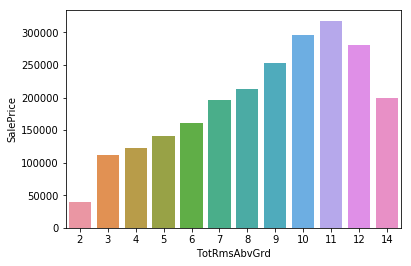

In [96]:
cars = train_df[["TotRmsAbvGrd", 'SalePrice']].groupby(["TotRmsAbvGrd"], as_index=False).mean()
data = cars
sns.barplot(y=data['SalePrice'], x=data["TotRmsAbvGrd"])

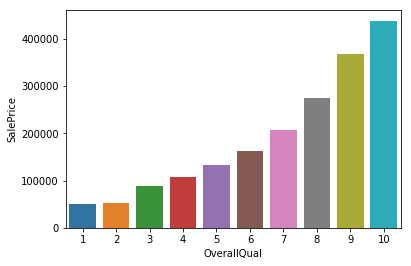

In [97]:
cars = train_df[["OverallQual", 'SalePrice']].groupby(["OverallQual"], as_index=False).mean()
data = cars
sns.barplot(y=data['SalePrice'], x=data["OverallQual"])